<a href="https://colab.research.google.com/github/DevanshD3/Clustering-Algorithms/blob/main/MinibatchKmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import load_files

# for reproducibility
random_state = 0 

DATA_DIR = "/content/drive/MyDrive/Data/CV.csv"
df = pd.read_csv(DATA_DIR, low_memory= False)
df.head()


,Author ID,Modified Description,ID
0,27348,Simple latch with two cross-coupled NOR gates.,137750
1,47272,Laboratorio. Sesión 3.FUNDAMENTOS DE COMPUTADORES,229813
2,36805,This is a 7 segment display.,249268
3,36489,Este bloque les servirá para el examen parcial,232819
4,30771,The external clock is directly connected to al...,249264


In [ ]:
vec = TfidfVectorizer(stop_words='english')
df['Modified Description'] = df['Modified Description'].fillna('')
vec_matrix = vec.fit_transform(df['Modified Description'])
features = vec.transform(df['Modified Description'])

In [ ]:
cls = MiniBatchKMeans(n_clusters=3, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [ ]:

# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

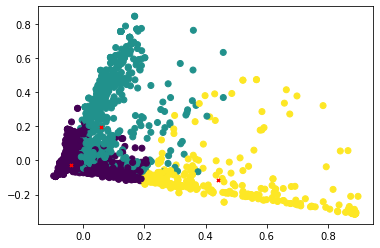

In [ ]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=10, c='r')